In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.model_selection
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
credit_data = pd.read_csv("credit.csv")
credit_data.head()

,Unnamed: 0,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,1,0,0.457619,0.224064,0.031838,1.288137,0.318193
1,2,0,0.121053,-0.114041,0.037298,0.457176,0.312122
2,3,0,-0.034844,-0.041509,0.017398,0.086529,0.186875
3,4,0,-0.007908,0.164338,0.045521,0.622297,0.106294
4,5,0,0.159241,0.429216,0.069642,5.060882,0.220953


In [670]:
credit_data_copy=credit_data.drop(['Unnamed: 0'], axis=1)
credit_data_copy.head()

,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,0,0.458,0.224,0.032,1.288,0.318
1,0,0.121,-0.114,0.037,0.457,0.312
2,0,-0.035,-0.042,0.017,0.087,0.187
3,0,-0.008,0.164,0.046,0.622,0.106
4,0,0.159,0.429,0.070,5.061,0.221


In [133]:
X = credit_data_copy.drop('Default', axis=1)
y = credit_data_copy['Default']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
model1 = sklearn.linear_model.LogisticRegression(solver='liblinear')
model1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [164]:
feature_names = X.columns.to_list
coefficients = model1.coef_
for i in range(len(coefficients[0])):
    print(f"Coefficient of {feature_names()[i]}: {coefficients[0][i]:.2f}")

Coefficient of WC/TA: -0.20
Coefficient of RE/TA: -2.53
Coefficient of EBIT/TA: -0.33
Coefficient of ME/TL: -1.05
Coefficient of S/TA: 1.01


In [165]:
y_prediction = model1.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_prediction)
print(f"R^2: {r2:.2f}")

R^2: -0.10


In [142]:
y_pred_test = model1.predict(X_test)
confusion = sklearn.metrics.confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = confusion.ravel()

print(f"True Positive: {tp}, False Negative: {fn}")
print(f"False Positive: {fp}, True Negative: {tn}")

True Positive: 4, False Negative: 10
False Positive: 1, True Negative: 134


In [20]:
#almost 70% inaccuracy classifying minority class

In [21]:
credit_data_copy['Default'].value_counts()

Default
0    674
1     70
Name: count, dtype: int64

In [ ]:
#oversample minortiy

In [143]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print(y_ros.value_counts())
print(y.value_counts())
print(X_ros.shape)
print(X.shape)

Default
0    674
1    674
Name: count, dtype: int64
Default
0    674
1     70
Name: count, dtype: int64
(1348, 5)
(744, 5)


In [144]:
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, random_state=42, test_size=0.2)

In [145]:
model1.fit(X_ros_train, y_ros_train)

LogisticRegression(solver='liblinear')

In [146]:
y_pred_ros = model1.predict(X_ros_test)
confusion_ros = sklearn.metrics.confusion_matrix(y_ros_test, y_pred_ros)
tn, fp, fn, tp = confusion_ros.ravel()

print(f"True Positive: {tp}, False Negative: {fn}")
print(f"False Positive: {fp}, True Negative: {tn}")

True Positive: 116, False Negative: 20
False Positive: 15, True Negative: 119


In [ ]:
#SMOTE

In [148]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X,y)
print(y_res_smote.value_counts())
print(y.value_counts())
print(X_res_smote.shape)
print(X.shape)

Default
0    674
1    674
Name: count, dtype: int64
Default
0    674
1     70
Name: count, dtype: int64
(1348, 5)
(744, 5)


In [149]:
X_smote_training, X_smote_test, y_smote_training, y_smote_test = train_test_split(X_sm,y_sm,random_state=42,test_size=0.2)

In [150]:
model1.fit(X_smote_test, y_smote_test)

LogisticRegression(solver='liblinear')

In [151]:
y_smote_pred = model1.predict(X_smote_test)
confusion_smote= sklearn.metrics.confusion_matrix(y_smote_test, y_smote_pred)
tn, fp, fn, tp = confusion_smote.ravel()

print(f"True Positive: {tp}, False Negative: {fn}")
print(f"False Positive: {fp}, True Negative: {tn}")

True Positive: 114, False Negative: 22
False Positive: 24, True Negative: 110


In [ ]:
#random forest

In [671]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_vals = [30,50,80,200,300,400,500]
best_score = 0
best_n_estimators = 0

for i in n_estimators_vals:
    rf=RandomForestClassifier(n_estimators=i, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_n_estimators = i

print(f"Best n_estimators: {best_n_estimators} with F1 score: {best_score:.2f}")

Best n_estimators: 200 with F1 score: 0.53


In [162]:
rand_forest = RandomForestClassifier(n_estimators=200, random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rf = rand_forest.predict(X_test)

confusion_rf= sklearn.metrics.confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = confusion_rf.ravel()

print(f"True Positive: {tp}, False Negative: {fn}")
print(f"False Positive: {fp}, True Negative: {tn}")

True Positive: 11, False Negative: 3
False Positive: 5, True Negative: 130


In [168]:
prob = model.predict_proba(X_test)[:,1]

In [172]:
roc_auc = sklearn.metrics.roc_auc_score(y_test, prob)
print(f"Area under curve: {roc_auc:.2f}")

Are under curve: 0.90


In [155]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, prob)

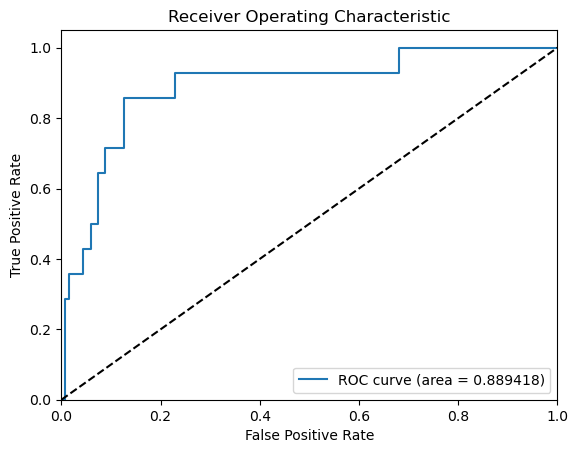

Threshold: inf, TPR: 0.000, FPR: 0.000
Threshold: 0.9998, TPR: 0.000, FPR: 0.007
Threshold: 0.9950, TPR: 0.286, FPR: 0.007
Threshold: 0.9759, TPR: 0.286, FPR: 0.015
Threshold: 0.9487, TPR: 0.357, FPR: 0.015
Threshold: 0.8853, TPR: 0.357, FPR: 0.044
Threshold: 0.8676, TPR: 0.429, FPR: 0.044
Threshold: 0.8600, TPR: 0.429, FPR: 0.059
Threshold: 0.8185, TPR: 0.500, FPR: 0.059
Threshold: 0.8133, TPR: 0.500, FPR: 0.074
Threshold: 0.7976, TPR: 0.643, FPR: 0.074
Threshold: 0.7757, TPR: 0.643, FPR: 0.089
Threshold: 0.7422, TPR: 0.714, FPR: 0.089
Threshold: 0.7057, TPR: 0.714, FPR: 0.126
Threshold: 0.6423, TPR: 0.857, FPR: 0.126
Threshold: 0.4917, TPR: 0.857, FPR: 0.230
Threshold: 0.4875, TPR: 0.929, FPR: 0.230
Threshold: 0.1742, TPR: 0.929, FPR: 0.681
Threshold: 0.1704, TPR: 1.000, FPR: 0.681
Threshold: 0.0000, TPR: 1.000, FPR: 1.000


In [156]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

for i in range(len(thresholds)):
    print(f'Threshold: {thresholds[i]:.4f}, TPR: {tpr[i]:.3f}, FPR: {fpr[i]:.3f}')

In [672]:
kf = sklearn.model_selection.StratifiedKFold(n_splits=10)
kf_auc = sklearn.model_selection.cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

In [673]:
kf_auc

array([0.80882353, 0.84033613, 0.88865546, 0.94957983, 0.43710021,
       0.99360341, 0.98507463, 0.96162047, 0.88486141, 0.97014925])

In [674]:
selector = RFE(model, n_features_to_select=1)
selector.fit(X, y)


ranking = selector.ranking_
ranked_features = sorted(zip(ranking, feature_names()))

print("Ranking of features:")
for rank, name in ranked_features:
    print(f"Feature: {name}, Rank: {rank}")

Ranking of features:
Feature: ME/TL, Rank: 1
Feature: RE/TA, Rank: 2
Feature: S/TA, Rank: 3
Feature: EBIT/TA, Rank: 4
Feature: WC/TA, Rank: 5


In [675]:
lasso_model = sklearn.linear_model.LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lasso_predictions = sklearn.model_selection.cross_val_predict(lasso_model, X, y, cv=kf, method='predict_proba')[:, 1]
fpr_lasso, tpr_lasso, _ = sklearn.metrics.roc_curve(y, lasso_predictions)
auc_lasso = sklearn.metrics.auc(fpr_lasso, tpr_lasso)

lasso_model.fit(X, y)
print("LASSO Model")
for i in range(len(feature_names())):
    print(f"Coefficient of {feature_names()[i]}: {lasso_model.coef_[0][i]:.2f}")


ridge_model = sklearn.linear_model.LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
ridge_predictions = sklearn.model_selection.cross_val_predict(ridge_model, X, y, cv=kf, method='predict_proba')[:,1]
fpr_ridge, tpr_ridge, _ = sklearn.metrics.roc_curve(y, ridge_predictions)
auc_ridge = sklearn.metrics.auc(fpr_ridge, tpr_ridge)

ridge_model.fit(X,y)
print("\n")
print("Ridge coefficients")
for i in range(len(feature_names())):
    print(f"Coefficient of {feature_names()[i]}: {ridge_model.coef_[0][i]:.2f}")

elastic_model = sklearn.linear_model.LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
elastic_predictions = sklearn.model_selection.cross_val_predict(elastic_model, X, y, cv=kf, method='predict_proba')[:, 1]
fpr_elastic, tpr_elastic, _ = sklearn.metrics.roc_curve(y, elastic_predictions)
auc_elastic = sklearn.metrics.auc(fpr_elastic, tpr_elastic)

elastic_model.fit(X,y)
print("\n")
print("Elastic model coefficients")
for i in range(len(feature_names())):
    print(f"Coefficient of {feature_names()[i]}: {elastic_model.coef_[0][i]:.2f}")
print("\n")
print(f"LASSO AUC: {auc_lasso:.3f}")
print(f"Ridge AUC: {auc_ridge:.3f}")
print(f"Elastic Net AUC: {auc_elastic:.3f}")
print("\n")
best_auc = max(auc_ridge, auc_lasso, auc_elastic)
if best_auc == auc_ridge:
    print("Best model: Ridge Regression")
elif best_auc == auc_lasso:
    print("Best model: LASSO Regression")
else:
    print("Best model: Elastic Net Regression")
print(f"AUC: {best_auc:.3f}")

LASSO Model
Coefficient of WC/TA: 0.09
Coefficient of RE/TA: -1.05
Coefficient of EBIT/TA: 0.00
Coefficient of ME/TL: -1.68
Coefficient of S/TA: 0.44


Ridge coefficients
Coefficient of WC/TA: 0.30
Coefficient of RE/TA: -1.09
Coefficient of EBIT/TA: -0.62
Coefficient of ME/TL: -1.62
Coefficient of S/TA: 0.58


Elastic model coefficients
Coefficient of WC/TA: 0.21
Coefficient of RE/TA: -1.10
Coefficient of EBIT/TA: -0.17
Coefficient of ME/TL: -1.60
Coefficient of S/TA: 0.62


LASSO AUC: 0.855
Ridge AUC: 0.859
Elastic Net AUC: 0.857


Best model: Ridge Regression
AUC: 0.859


In [191]:
lasso_conf_matrix = sklearn.model_selection.cross_val_predict(lasso_model, X, y, cv=kf)
ridge_conf_matrix = sklearn.model_selection.cross_val_predict(ridge_model, X, y, cv=kf)
elastic_conf_matrix = sklearn.model_selection.cross_val_predict(elastic_model, X, y, cv=kf)

lasso_CM = sklearn.metrics.confusion_matrix(y, lasso_conf_matrix)
ridge_CM = sklearn.metrics.confusion_matrix(y, ridge_conf_matrix)
elastic_CM = sklearn.metrics.confusion_matrix(y, elastic_conf_matrix)

l_tn, l_fp, l_fn, l_tp = lasso_CM.ravel()
r_tn, r_fp, r_fn, r_tp = ridge_CM.ravel()
e_tn, e_fp, e_fn, e_tp = elastic_CM.ravel()

print("LASSO Confusion Matrix:\n")
print(f"True Positive: {l_tp}, False Negative: {l_fn}")
print(f"False Positive: {l_fp}, True Negative: {l_tn}")
print("\n")

print("Ridge Confusion Matrix:\n")
print(f"True Positive: {r_tp}, False Negative: {r_fn}")
print(f"False Positive: {r_fp}, True Negative: {r_tn}")
print("\n")

print("Elastic Confusion Matrix:\n")
print(f"True Positive: {e_tp}, False Negative: {e_fn}")
print(f"False Positive: {e_fp}, True Negative: {e_tn}")
print("\n")

LASSO Confusion Matrix:

True Positive: 10, False Negative: 60
False Positive: 6, True Negative: 668


Ridge Confusion Matrix:

True Positive: 10, False Negative: 60
False Positive: 6, True Negative: 668


Elastic Confusion Matrix:

True Positive: 11, False Negative: 59
False Positive: 7, True Negative: 667




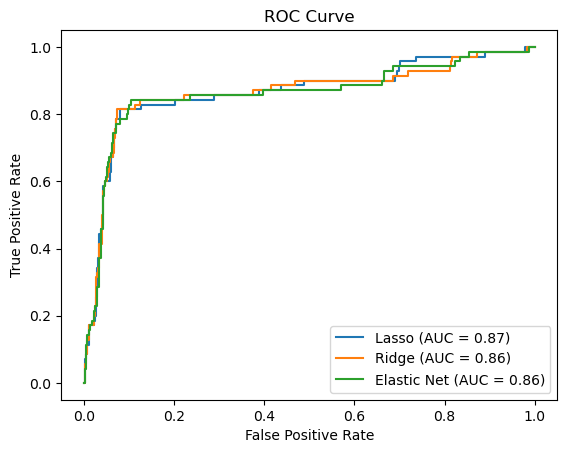

In [119]:
plt.figure()
plt.plot(fpr_lasso, tpr_lasso, label=f'Lasso (AUC = {auc_lasso:.2f})')
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge (AUC = {auc_ridge:.2f})')
plt.plot(fpr_elastic, tpr_elastic, label=f'Elastic Net (AUC = {auc_elastic:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [195]:
turkish_yield = pd.read_csv("turkish_yields.csv")

In [197]:
turkish_yield.head()

,Unnamed: 0,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600
0,4.05.2011,7.3810,7.6529,7.9206,8.2506,8.6870,8.9811,9.3496,9.5224,9.5844
1,5.05.2011,6.9982,7.5259,7.9373,8.2715,8.6741,8.9573,9.3241,9.5061,9.5878
2,6.05.2011,7.3988,7.5810,7.8004,8.1270,8.5980,8.9231,9.3305,9.5224,9.5970
3,9.05.2011,7.3611,7.5695,7.8033,8.1324,8.5793,8.8806,9.2697,9.4763,9.6031
4,10.05.2011,6.5318,7.1238,7.6507,8.2230,8.7718,9.0323,9.3237,9.4957,9.6395


In [215]:
turkish_yield[:10]

,Date,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600
0,2011-05-04,7.3810,7.6529,7.9206,8.2506,8.6870,8.9811,9.3496,9.5224,9.5844
1,2011-05-05,6.9982,7.5259,7.9373,8.2715,8.6741,8.9573,9.3241,9.5061,9.5878
2,2011-05-06,7.3988,7.5810,7.8004,8.1270,8.5980,8.9231,9.3305,9.5224,9.5970
3,2011-05-09,7.3611,7.5695,7.8033,8.1324,8.5793,8.8806,9.2697,9.4763,9.6031
4,2011-05-10,6.5318,7.1238,7.6507,8.2230,8.7718,9.0323,9.3237,9.4957,9.6395
5,2011-05-11,7.0722,7.5200,7.9278,8.3769,8.8646,9.1392,9.4702,9.6480,9.7727
6,2011-05-12,7.2090,7.5738,7.9329,8.3511,8.8004,9.0483,9.3626,9.5654,9.7697
7,2011-05-13,7.2330,7.5130,7.8521,8.3487,8.8751,9.1323,9.4261,9.6034,9.7754
8,2011-05-16,7.2855,7.7621,8.1661,8.5948,9.0163,9.2328,9.5066,9.6985,9.9204
9,2011-05-17,7.4879,7.7555,8.0777,8.5300,9.0036,9.2344,9.4953,9.6538,9.8054


In [207]:
turkish_yield['Unnamed: 0']= pd.to_datetime(turkish_yield['Unnamed: 0'], format='%d.%m.%Y')

In [208]:
turkish_yield.rename(columns={'Unnamed: 0':'Date'},inplace=True)

In [211]:
turkish_yield.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2659,2016-08-16 12:00:16.246709248,2011-05-04 00:00:00,2013-12-26 12:00:00,2016-08-15 00:00:00,2019-04-04 12:00:00,2021-12-07 00:00:00,NaN
X30,2659.0,11.555316,3.709,8.297123,9.9084,13.378012,30.44469,5.090165
X90,2659.0,11.689976,3.9217,8.41245,10.0192,13.566714,29.088428,4.962308
X180,2659.0,11.834735,4.2143,8.6033,10.1602,13.739037,28.449142,4.832621
X360,2659.0,11.989251,4.5019,8.79665,10.4652,13.901249,27.780526,4.682574
X720,2659.0,12.043765,4.9326,9.1213,10.7778,13.973995,28.835422,4.45702
X1080,2659.0,11.993279,5.2385,9.2336,10.8964,13.936496,28.35237,4.252555
X1800,2659.0,11.849195,5.703,9.29585,10.7701,13.521024,26.667753,3.888416
X2520,2659.0,11.710016,6.0155,9.37395,10.604226,13.282123,24.238348,3.564807
X3600,2659.0,11.53042,5.7674,9.3963,10.4768,13.301136,21.177129,3.158489


In [212]:
monthly_data = turkish_yield.resample('M', on='Date').mean()

positive_yields_10 = (monthly_data['X3600']>0).sum()
positive_yields_2 = (monthly_data['X720']>0).sum()
print("Number of positive yields for 2 years bonds:",positive_yields_2)
print("Number of positive yields for 10 years bonds:",positive_yields_10)

Number of positive yields for 2 years bonds: 128
Number of positive yields for 10 years bonds: 128


In [251]:
monthly_data['Spread'] = monthly_data['X3600'] - monthly_data['X30']

In [265]:
monthly_data['Spread'].describe()

count    128.000000
mean       0.005759
std        2.993308
min      -10.068884
25%       -0.862341
50%        0.337059
75%        1.678832
max        7.890829
Name: Spread, dtype: float64

In [252]:
flattened_periods = monthly_data[monthly_data['Spread'] < 0]

In [677]:
flattened_periods.shape

(53, 10)

In [256]:
flattened_periods['Spread'].describe()[['min', 'max']]

min   -10.068884
max    -0.003755
Name: Spread, dtype: float64

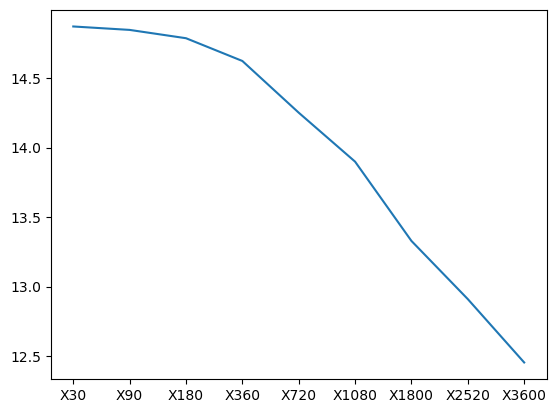

In [293]:
averages_flat = flattened_periods.mean(axis=0)[:-1]
plt.figure()
plt.plot(averages_flat)

In [257]:
flattened_periods_redefined = monthly_data[(monthly_data['Spread'] < 0) & (monthly_data['Spread'] > -0.5)]

In [258]:
flattened_periods_redefined

,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600,Spread
Date,,,,,,,,,,
2011-12-31,10.076132,10.372273,10.565955,10.505914,10.411677,10.165159,10.003764,9.844100,9.581100,-0.495032
2012-05-31,9.776655,9.931886,9.998536,9.835991,9.529873,9.397373,9.287905,9.261877,9.284332,-0.492323
2014-05-31,9.365820,9.289330,9.194405,9.074500,9.008175,9.033225,9.128850,9.227490,9.362065,-0.003755
2015-04-30,8.988105,9.074948,9.175400,9.286414,9.297748,9.221033,9.042110,8.880481,8.677529,-0.310576
2015-05-31,9.194632,9.344784,9.520189,9.712858,9.746405,9.647653,9.434105,9.274032,9.125063,-0.069568
2015-06-30,9.777500,9.836245,9.900445,9.961273,9.929386,9.844668,9.680845,9.554059,9.419323,-0.358177
2015-07-31,9.736950,9.759818,9.787582,9.820895,9.827645,9.798200,9.712777,9.616086,9.464877,-0.272073
2015-11-30,9.934643,10.011324,10.102019,10.223600,10.300495,10.293410,10.199486,10.053081,9.789314,-0.145329
2016-03-31,10.458174,10.455952,10.448413,10.421039,10.347417,10.283074,10.206530,10.190313,10.237635,-0.220539


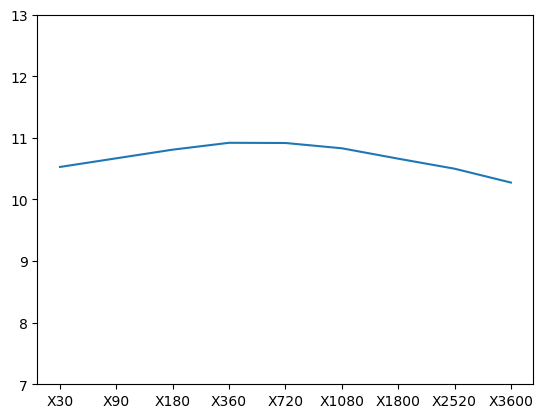

In [311]:
averages_flat_new = flattened_periods_redefined.mean(axis=0)[:-1]
plt.figure()
plt.ylim(7,13)
plt.plot(averages_flat_new)

In [287]:
steepened_periods = monthly_data[monthly_data['Spread'] > 2.5]
steepened_periods

,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600,Spread
Date,,,,,,,,,,
2011-09-30,6.896833,7.307276,7.670948,8.043600,8.326767,8.464543,8.770786,9.185486,9.908405,3.011571
2012-10-31,5.917445,6.288665,6.670630,7.095430,7.467660,7.644460,7.887270,8.111070,8.457660,2.540215
2016-10-31,7.433957,7.688310,8.011224,8.501976,9.020676,9.287729,9.624038,9.860176,10.143505,2.709548
2016-11-30,7.957032,8.343705,8.819150,9.530427,10.229309,10.534209,10.839991,10.950932,10.950768,2.993736
2016-12-31,7.631977,8.233082,9.013705,10.075245,10.954914,11.252945,11.446864,11.465114,11.395818,3.763841
2017-01-31,7.962459,8.612159,9.431286,10.511295,11.284714,11.478932,11.524023,11.459377,11.337345,3.374886
2020-03-31,9.444437,9.787601,10.246362,10.957943,11.849052,12.369738,12.833360,12.818965,12.449097,3.004660
2020-04-30,7.620892,8.278541,9.151743,10.468486,12.009808,12.887258,13.706519,13.786372,13.396971,5.776079
2020-05-31,5.646296,6.309289,7.188222,8.537067,10.248457,11.358255,12.660386,13.213063,13.537125,7.890829


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


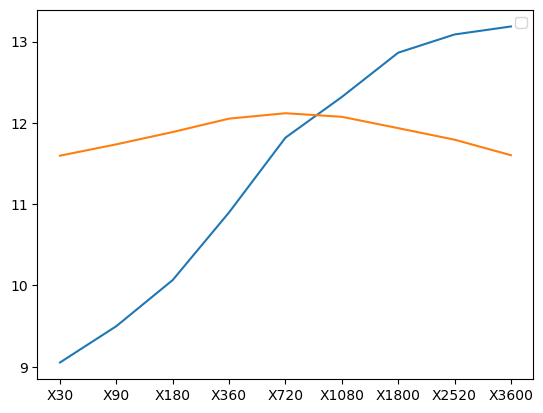

In [678]:
avg_steepened = steepened_periods.mean(axis=0)[:-1]
avg_normal = monthly_data.mean(axis=0)[:-1]
plt.plot(avg_steepened)
plt.plot(avg_normal)

(8.0, 12.0)

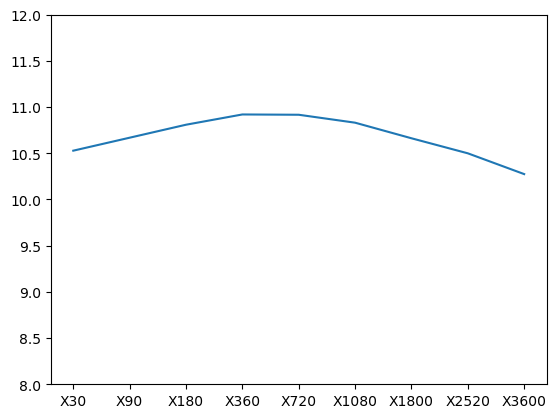

In [679]:
averages_flat = flattened_periods_redefined.mean(axis=0)[:-1]
plt.figure()
plt.plot(averages_flat)
plt.ylim(8,12)

In [313]:
turkish_yield['Year']=turkish_yield['Date'].dt.year

In [314]:
data_2013 = turkish_yield[turkish_yield['Year'] == 2013].iloc[:,1:-1]
data_2018 = turkish_yield[turkish_yield['Year'] == 2018].iloc[:, 1:-1]
data_2019 = turkish_yield[turkish_yield['Year'] == 2019].iloc[:, 1:-1]

In [315]:
data_2013

,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600,Spread
419,5.8503,5.9560,6.0562,6.1369,6.2690,6.4103,6.6307,6.7680,6.8713,0.6023
420,5.8311,5.9775,6.1219,6.2556,6.4394,6.6022,6.8332,6.9520,6.9983,0.5589
421,5.6223,5.8615,6.0906,6.2904,6.5092,6.6871,6.9335,7.0599,7.1104,0.6012
422,5.8725,6.0041,6.1233,6.2193,6.3370,6.4501,6.6461,6.8034,6.9943,0.6573
423,5.7730,5.9163,6.0361,6.1050,6.2036,6.3238,6.5267,6.6671,6.7986,0.5950
...,...,...,...,...,...,...,...,...,...,...
663,8.7241,8.8654,9.0645,9.3688,9.7187,9.9064,10.0983,10.1568,10.1128,0.3941
664,8.6549,8.8467,9.1049,9.4746,9.8289,9.9794,10.1805,10.3752,10.6955,0.8666
665,9.4015,9.5484,9.7406,10.0109,10.2406,10.3159,10.3971,10.4844,10.6514,0.4108
666,8.9093,9.1434,9.4404,9.8555,10.1962,10.2820,10.3198,10.3419,10.4039,0.2077


In [688]:
def pc_a(x):
    pca = PCA(n_components=2)
    pca.fit(x)
    components = pca.components_
    index = np.argmax(np.abs(components), axis=1)
    names = x.columns[index]
    explained_variance_ratio = np.round(pca.explained_variance_ratio_, 2)
    return explained_variance_ratio, names

In [325]:
print(f"First two principal components explain variation respectively for 2013:", pc_a(data_2013))
print(f"First two principal components explain variation respectively for 2018:", pc_a(data_2018))
print(f"First two principal components explain variation respectively for 2019:", pc_a(data_2019))

First two principal components explain variation respectively for 2013: (array([0.97, 0.02]), Index(['X720', 'X30'], dtype='object'))
First two principal components explain variation respectively for 2018: (array([0.9 , 0.08]), Index(['X360', 'X30'], dtype='object'))
First two principal components explain variation respectively for 2019: (array([0.95, 0.04]), Index(['X30', 'X30'], dtype='object'))


In [327]:
logit1=pd.read_csv('logit1.csv')

In [345]:
logit1.head()

,default,WCTA,RETA,EBITTA,METL,STA
0,0,0.501,0.307,0.043,0.956,0.335
1,0,0.550,0.320,0.050,1.060,0.330
2,0,0.450,0.230,0.030,0.800,0.250
3,0,0.310,0.190,0.030,0.390,0.250
4,0,0.450,0.220,0.030,0.790,0.280


In [346]:
logit1.describe().T

,count,mean,std,min,25%,50%,75%,max
default,4000.0,0.018000,0.132968,0.00,0.00,0.00,0.00,1.00
WCTA,4000.0,0.142578,0.170711,-2.24,0.03,0.12,0.24,0.77
RETA,4000.0,0.210374,0.332539,-3.31,0.09,0.22,0.37,1.64
EBITTA,4000.0,0.051813,0.029647,-0.59,0.04,0.05,0.07,0.20
METL,4000.0,1.953931,2.994476,0.02,0.62,1.14,2.24,60.61
STA,4000.0,0.303639,0.205834,0.04,0.17,0.26,0.37,5.01


In [486]:
X2 = logit1.drop(columns=['default'])
y2 = logit1['default']

In [487]:
X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X2,y2,test_size=0.2)

In [488]:
X2_train.shape, X2_test.shape

((3200, 5), (800, 5))

In [489]:
X2_train.describe()

,WCTA,RETA,EBITTA,METL,STA
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,0.143866,0.210537,0.051826,1.964511,0.303723
std,0.167013,0.336598,0.030300,3.000812,0.209933
min,-2.040000,-3.310000,-0.590000,0.030000,0.040000
25%,0.030000,0.097500,0.040000,0.630000,0.170000
50%,0.120000,0.220000,0.050000,1.150000,0.260000
75%,0.240000,0.380000,0.070000,2.270000,0.370000
max,0.750000,1.510000,0.200000,60.610000,5.010000


In [509]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [510]:
sc = StandardScaler()

In [535]:
neurons = [1, 2, 3]
models = []
auc_scores = []

In [512]:
scaler = sc.fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [527]:
X2_train_scaled_df = pd.DataFrame(X2_train_scaled, columns=['1','2','3','4','5'])

In [530]:
pd.set_option('display.float_format', '{:.3f}'.format)
X2_train_scaled_df.describe()

,1,2,3,4,5
count,3200.000,3200.000,3200.000,3200.000,3200.000
mean,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-13.078,-10.461,-21.186,-0.645,-1.256
25%,-0.682,-0.336,-0.390,-0.445,-0.637
50%,-0.143,0.028,-0.060,-0.271,-0.208
75%,0.576,0.504,0.600,0.102,0.316
max,3.630,3.861,4.891,19.546,22.422


In [666]:
def train_mlp(x):
    mlp = MLPClassifier(hidden_layer_sizes=x, max_iter=1000, solver='lbfgs', activation='logistic')
    mlp.fit(X2_train_scaled, y2_train)
    return mlp

In [667]:
mlp_models = [train_mlp(n) for n in neurons]
mlp_models

[MLPClassifier(activation='logistic', hidden_layer_sizes=1, max_iter=1000,
               solver='lbfgs'),
 MLPClassifier(activation='logistic', hidden_layer_sizes=2, max_iter=1000,
               solver='lbfgs'),
 MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=1000,
               solver='lbfgs')]

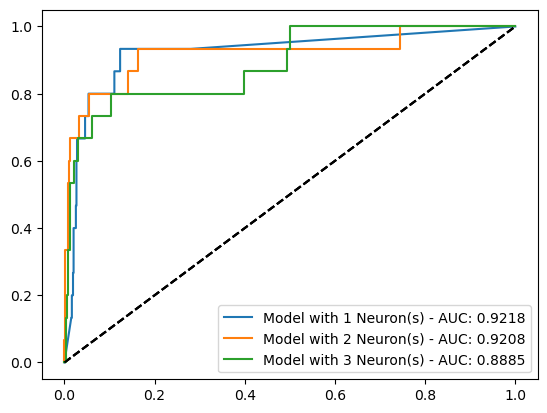

In [668]:
for i, mlp in enumerate(mlp_models):
    y_pred_prob = mlp.predict_proba(X2_test_scaled)[:, 1]
    fpr2, tpr2, _ = sklearn.metrics.roc_curve(y2_test, y_pred_prob)
    auc = sklearn.metrics.roc_auc_score(y2_test, y_pred_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr2, tpr2, label=f'Model with {neurons[i]} Neuron(s) - AUC: {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()

In [537]:
index = auc_scores.index(max(auc_scores))
best_model_neurons = neurons[index] 
print(f"The best model is with {best_model_neurons} hidden neuron(s) with AUC: {auc_scores[index]:.4f}")

The best model is with 2 hidden neuron(s) with AUC: 0.9350


In [553]:
best_model = mlp_models[index]
y_pred_prob_best = best_model.predict_proba(X2_test_scaled)[:,1]

thresholds = np.linspace(0, 1, 101)
accuracy_scores = []

for i in thresholds:
    y_pred_best = (y_pred_prob_best >= i).astype(int)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y2_test, y_pred_best).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

In [554]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [555]:
best_threshold_index = np.argmax(accuracy_scores)
best_threshold = thresholds[best_threshold_index]
best_accuracy = accuracy_scores[best_threshold_index]

best_threshold, best_accuracy

(0.53, 0.98625)

In [697]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [698]:
y_pred_probability = dt_model.predict_proba(X2_test)[:, 1]

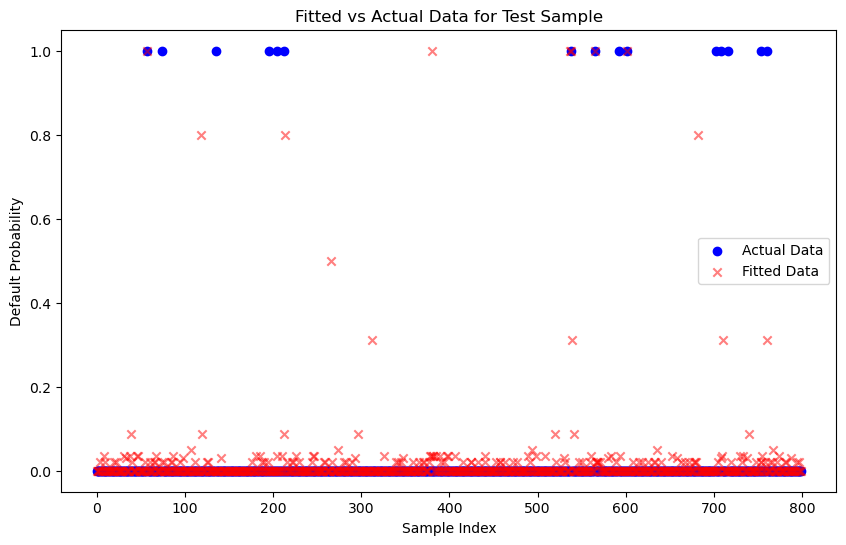

In [699]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y2_test)), y2_test, color='blue', label='Actual Data', marker='o')
plt.scatter(range(len(y2_test)), y_pred_probability, color='red', label='Fitted Data', alpha=0.5, marker='x')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Default Probability')
plt.title('Fitted vs Actual Data for Test Sample')
plt.show()


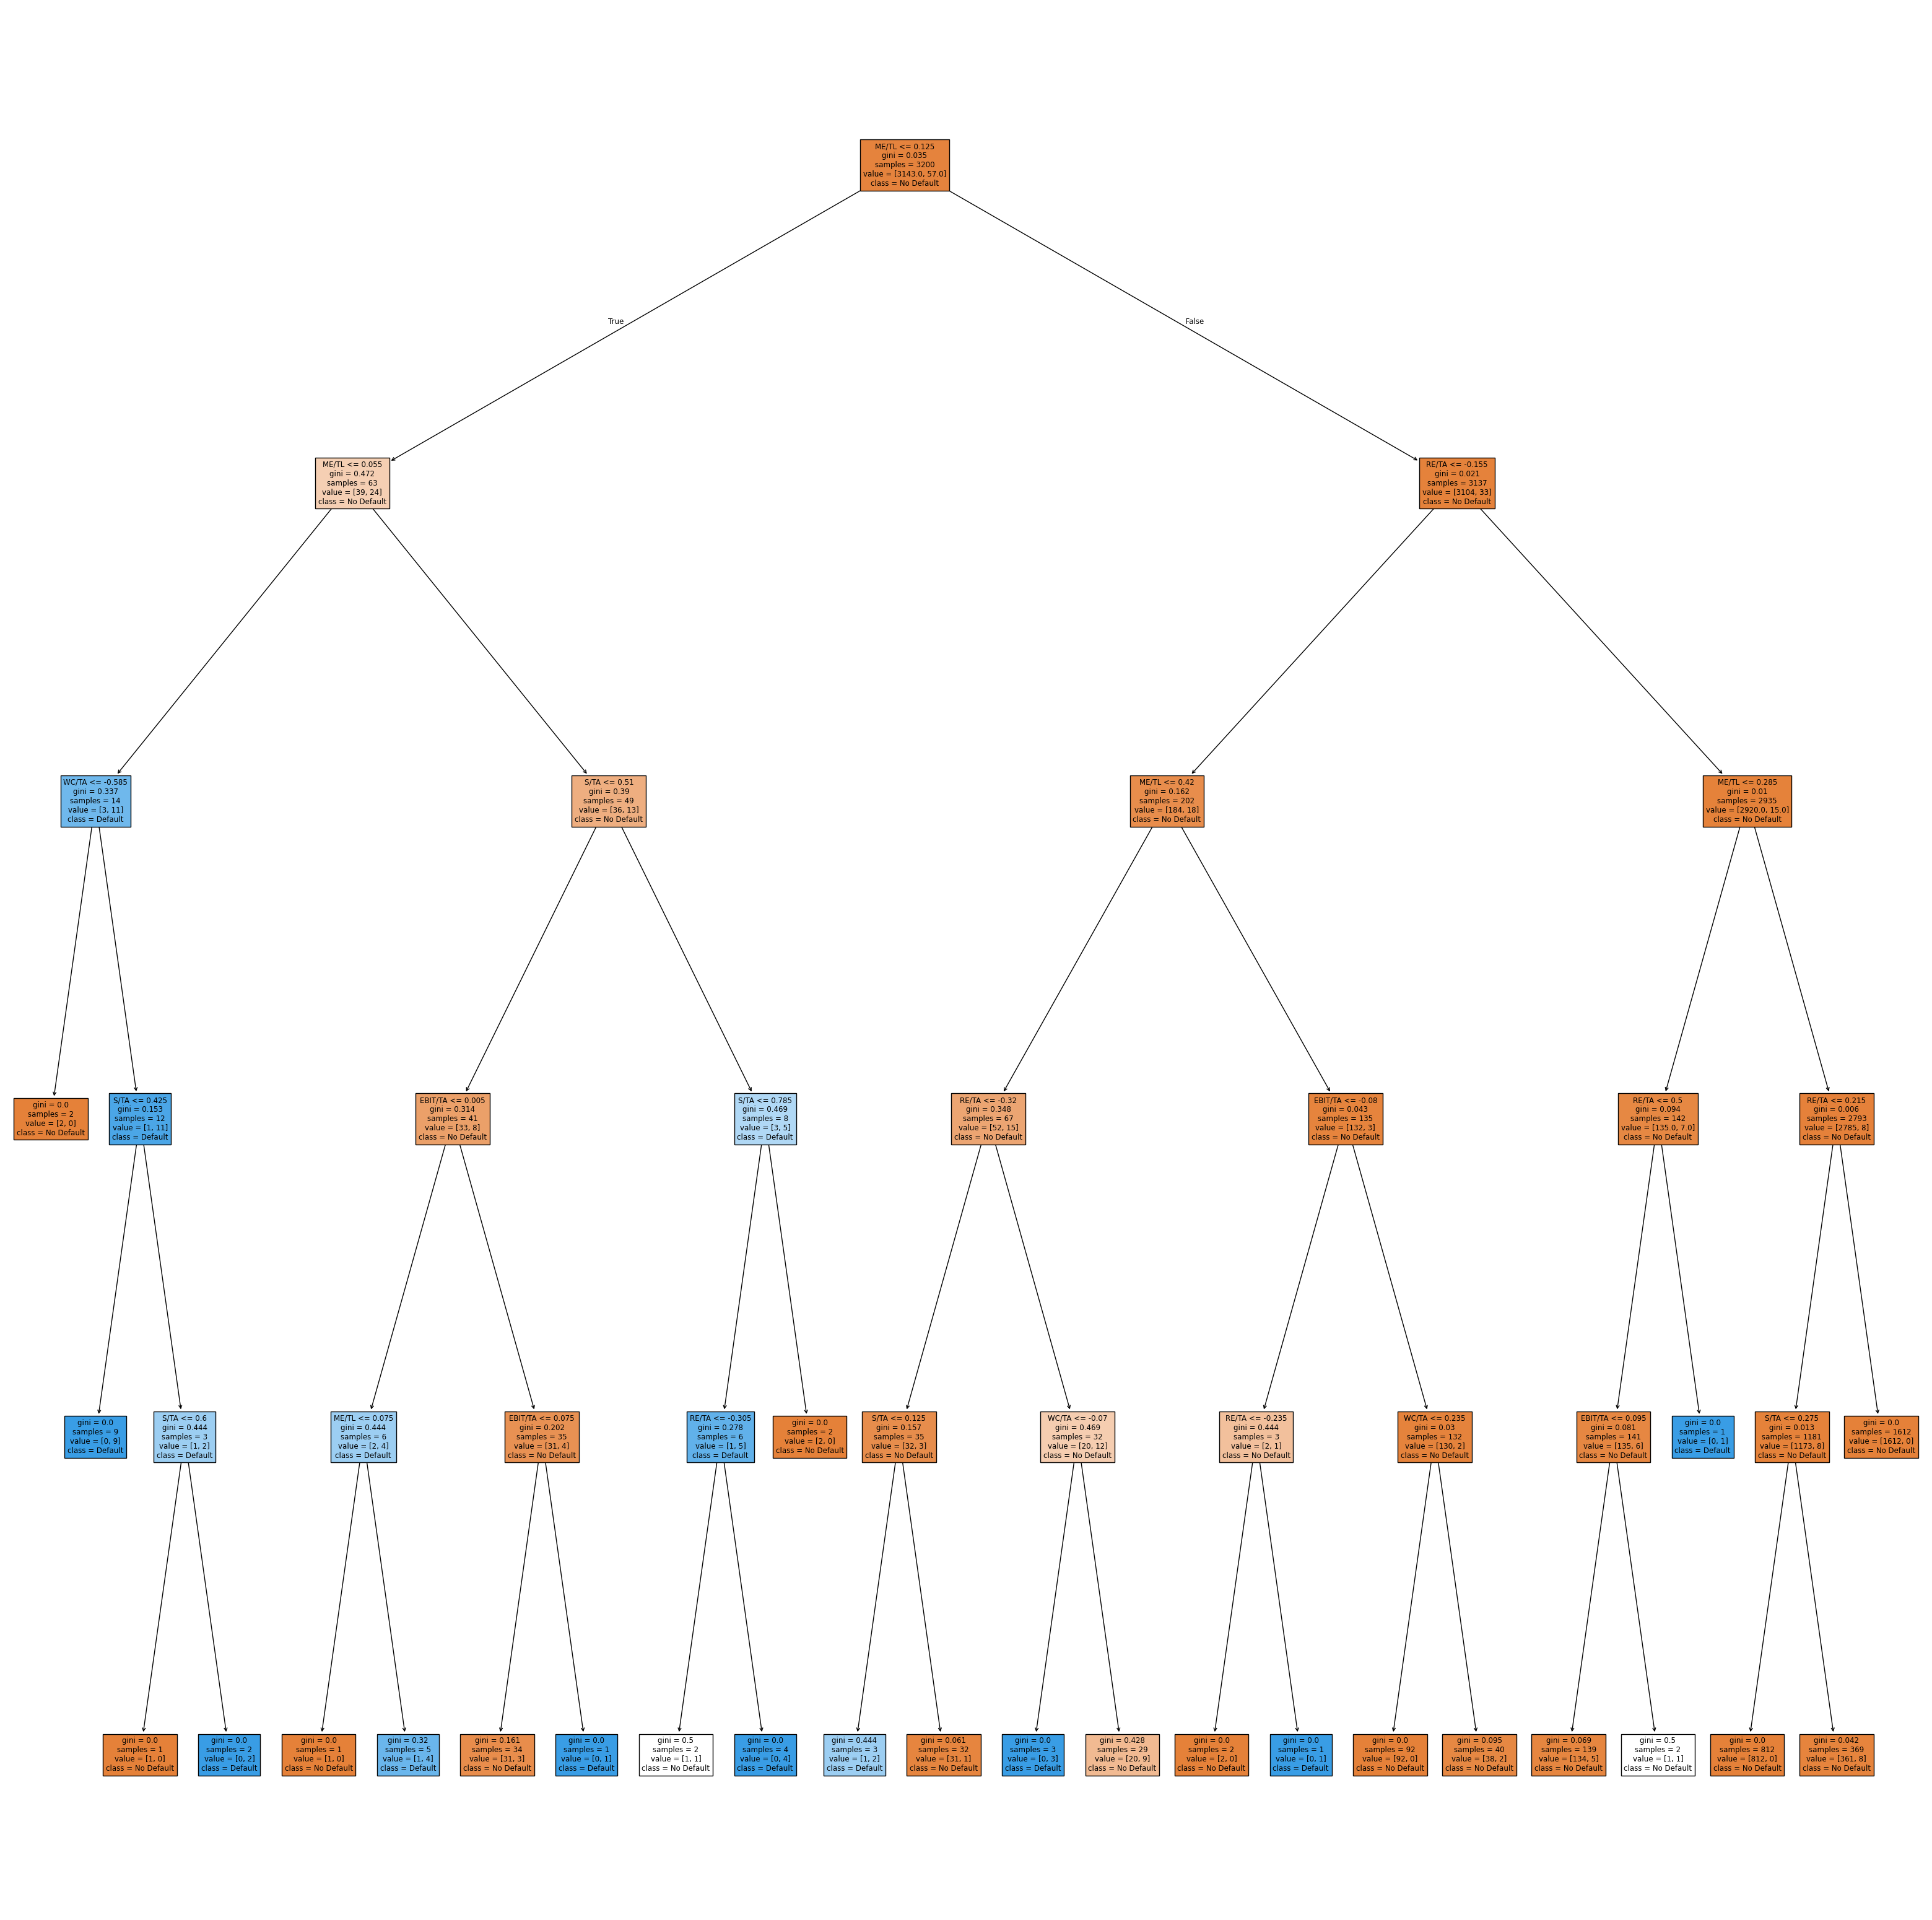

In [700]:
plt.figure(figsize=(40, 40))
sklearn.tree.plot_tree(dt_model, filled=True, feature_names=X.columns.tolist(), class_names=['No Default', 'Default'])
plt.show()

In [718]:
def plot_feature_importances(model):
    n_features = X2.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt. yticks(np.arange(n_features), X2.columns.tolist())
    plt.xlabel ("Feature importance")
    plt.ylabel ("Feature")
    plt.ylim(-1, n_features)

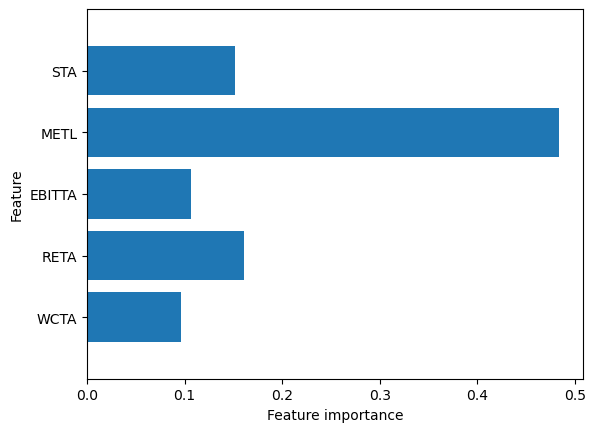

In [719]:
plot_feature_importances(dt_model)

In [701]:
print(f'{dt_model.score(X2_train, y2_train):.3f}')

0.990


In [565]:
threshold = 0.75
y_predi = (y_pred_probability >= threshold).astype(int)
confusion_matrix_ = sklearn.metrics.confusion_matrix(y2_test, y_predi)

In [567]:
truth_table = pd.DataFrame(confusion_matrix_, columns=['Predicted No Default', 'Predicted Default'], index=['Actual No Default', 'Actual Default'])
accuracy_ratio = accuracy_score(y2_test, y_predi)

In [568]:
print("Truth Table:")
print(truth_table)
print("\nAccuracy Ratio: {:.2f}".format(accuracy_ratio))

Truth Table:
                   Predicted No Default  Predicted Default
Actual No Default                   775                 10
Actual Default                       10                  5

Accuracy Ratio: 0.97


In [569]:
roc_auc2 = sklearn.metrics.roc_auc_score(y2_test, y_pred_probability)

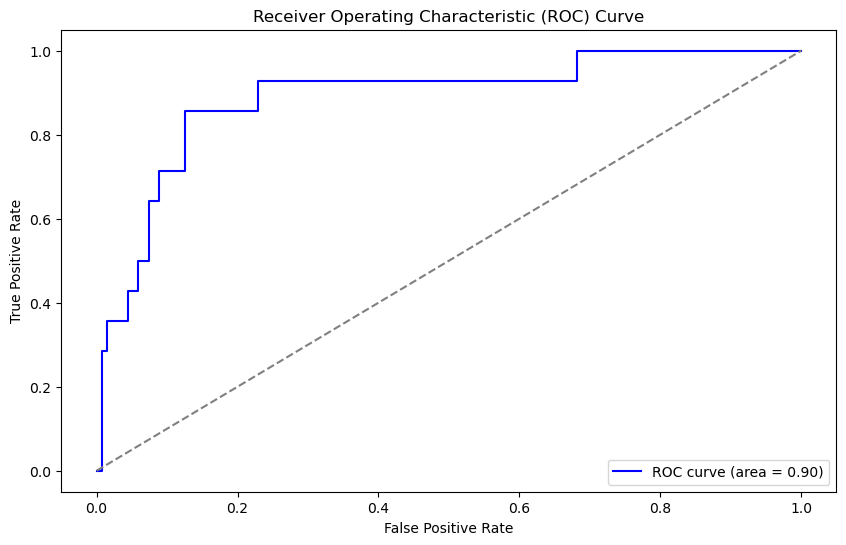

In [570]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()